In [5]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi, Delaunay
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
import pandas as pd

# Example H-représentation

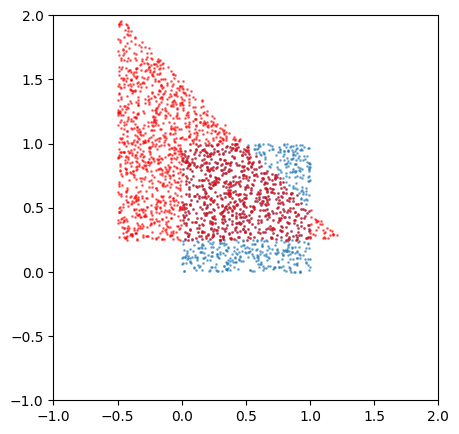

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def in_square(points):
    A_square = np.array([
        [-1, 0],
        [1, 0],
        [0, -1],
        [0, 1]
    ])
    b_square = np.array([0, 1, 0, 1])
    return np.all(A_square @ points.T <= b_square[:, None], axis=0)

def in_triangle(points):
    A_triangle = np.array([
        [-1  , 0],
        [0, -1],
        [1, 1]
    ])
    b_triangle = np.array([0.5, -0.25, 1.5])
    return np.all(A_triangle @ points.T <= b_triangle[:, None], axis=0)


n_points = 20000
points = np.random.uniform(-2, 2, (n_points, 2))


points_in_square = points[in_square(points)]
points_in_triangle = points[in_triangle(points)]


plt.figure(figsize=(10, 5))

plt.scatter(points_in_square[:, 0], points_in_square[:, 1], s=1, alpha=0.5)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(points_in_triangle[:, 0], points_in_triangle[:, 1], s=1, alpha=0.5, color="r")
plt.xlim(-1, 2)
plt.ylim(-1, 2)


plt.show()


In [2]:
from itertools import combinations

def find_intersection_points(A, b):
    points = []
    for comb in combinations(range(len(A)), 2):
        A_sub = A[list(comb)]
        b_sub = b[list(comb)]
        try:
            point = np.linalg.solve(A_sub, b_sub)
            if np.all(A @ point <= b):
                points.append(point)
        except np.linalg.LinAlgError:
            continue
    return np.array(points)

In [3]:
A_square = np.array([
    [-1, 0],
    [1, 0],
    [0, -1],
    [0, 1]
])
b_square = np.array([0, 1, 0, 1])

A_triangle = np.array([
    [-1  , 0],
    [0, -1],
    [1, 1]
])
b_triangle = np.array([0.5, -0.25, 1.5])

A_combined = np.vstack([A_square, A_triangle])
b_combined = np.hstack([b_square, b_triangle])

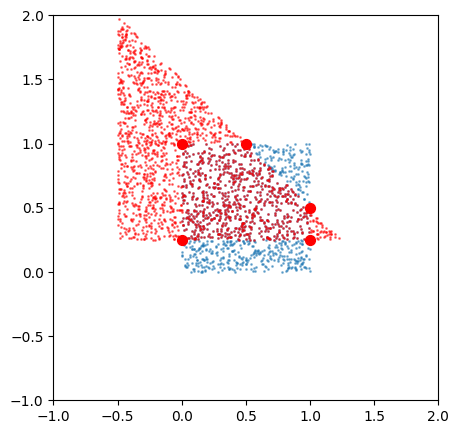

In [4]:
points_inter = find_intersection_points(A_combined, b_combined)


n_points = 20000
points = np.random.uniform(-2, 2, (n_points, 2))


points_in_square = points[in_square(points)]
points_in_triangle = points[in_triangle(points)]


plt.figure(figsize=(10, 5))

plt.scatter(points_in_square[:, 0], points_in_square[:, 1], s=1, alpha=0.5)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(points_in_triangle[:, 0], points_in_triangle[:, 1], s=1, alpha=0.5, color="r")
plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.scatter(points_inter[:, 0], points_inter[:, 1], c='red', marker='o', s=50, label='Vertices of Intersection')


plt.show()
plt.show()

In [5]:
import numpy as np
from scipy.spatial import ConvexHull
from itertools import combinations

# Sommets du carré
points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
])

# Calculer la H-représentation à partir des sommets
hull = ConvexHull(points)

# Extraire les équations des hyperplans (faces)
A = hull.equations[:, :-1]
b = -hull.equations[:, -1]

print("A (normal vectors of the hyperplanes):")
print(A)
print("b (offsets of the hyperplanes):")
print(b)

A (normal vectors of the hyperplanes):
[[-0. -1.]
 [ 1. -0.]
 [-1.  0.]
 [-0.  1.]]
b (offsets of the hyperplanes):
[-0.  1.  0.  1.]


# Voronoï Volume 

In [57]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
import pandas as pd

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

dim = 2
points = np.random.rand(20, dim)

In [16]:
# 2^dim possibility ([0;2^dim-1]) and each combination is 0 or 1 so we have to write 
# binary representation of each number and then split each symbol (0,1)
ref_far_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)
    
scaled_reference = 4*np.sqrt(dim) # have to be farther than the points inside the [0,1]^dim : > sqrt(dim)
ref_far_points *= scaled_reference
ref_far_points -= scaled_reference/2

extended_points = np.vstack([points, ref_far_points])

vor = Voronoi(points)
vor_extended = Voronoi(points, furthest_site=False)

## Plot (dim=2 only)

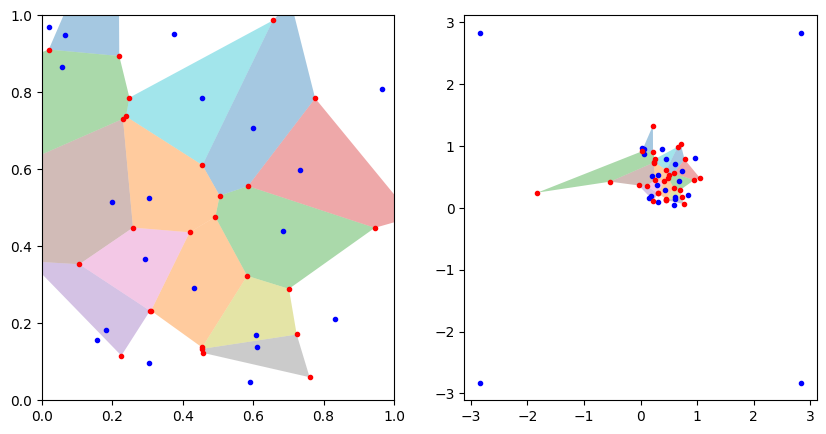

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(points[:, 0], points[:, 1], 'b.')
axs[0].plot(vor.vertices[:, 0], vor.vertices[:, 1], 'r.')
for region in vor_extended.regions:
    if not -1 in region:
        polygon = [vor_extended.vertices[i] for i in region]
        axs[0].fill(*zip(*polygon), alpha=0.4)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

axs[1].plot(extended_points[:, 0], extended_points[:, 1], 'b.')
axs[1].plot(vor_extended.vertices[:, 0], vor_extended.vertices[:, 1], 'r.')
for region in vor_extended.regions:
    if not -1 in region:
        polygon = [vor_extended.vertices[i] for i in region]
        axs[1].fill(*zip(*polygon), alpha=0.4)

plt.show()


## H-représentation 

We have set points of all region (red points) but some regions are out of boundaries ($[0,1]^{dim}$). We have to clip these edges. Certainly it exists some ways to do this directly in 2D but even in 3D we need to do this in dim-D.

Fortnutaly, we are working with convex polytopes : regions & hypercube ($[0,1]^{dim}$), because we have their points we have their V-representation and we want the V-representation of their intersection. 

We pass throughtout the H-representation to do this. H-representation consists to exprime the polytope as the set of points verifying these inequalities : $Ax \leq b$
 
A is a (m,dim) matrix and b is a m vector, with m the number of vertices in the V-representation (i'm not sure of the definition so it can be false, but you understand the idea)

The system of inequalities allows to cut the space into lot of hyperplane. Combining both system of inequalities (from both V-representation of regions and hypercube) we get the H-representation of their intersection.

Then we extract candidates from this big system and we find all points for the V-representation of their intersection.

In [5]:
hypercube_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)

hull_hypercube = ConvexHull(hypercube_points)
A_hypercube = hull_hypercube.equations[:, :-1]
b_hypercube = -hull_hypercube.equations[:, -1]

In [6]:
def is_arr_include(arr_check, arr_ref):
    return all(any(np.array_equal(array, item) for item in arr_ref) for array in arr_check)

In [7]:
def V_representation(A, b):
    points = []
    for comb in combinations(range(len(A)), dim):
        A_sub = A[list(comb)]
        b_sub = b[list(comb)]
        try:
            point = np.linalg.solve(A_sub, b_sub)
            if np.all(A @ point <= b + 1e-5): # ! tolerance
                points.append(point)
        except np.linalg.LinAlgError:
            continue
    return np.array(points)

In [8]:
vertices_regions_inside = []
vertices_inside = [v for v in vor_extended.vertices if np.all(v >= 0) and np.all(v <= 1)]
for reg in vor_extended.regions:
    if -1 in reg or len(reg)==0 : # ignore this reg, it not belongs to the hypercube (because ref_far points)
        continue
    
    polytope = [vor_extended.vertices[i] for i in reg]

    if is_arr_include(polytope, vertices_inside): # if the region is inside the hypercube doesn't need to compute intersection (clip)
        vertices_regions_inside.append(polytope)
        continue

    hull = ConvexHull(polytope)
    A = hull.equations[:, :-1]
    b = -hull.equations[:, -1]

    A_combined = np.vstack([A, A_hypercube])
    b_combined = np.hstack([b, b_hypercube])

    points_inter = V_representation(A_combined, b_combined)
    vertices_regions_inside.append(points_inter)

## Plots (dim=2 only)

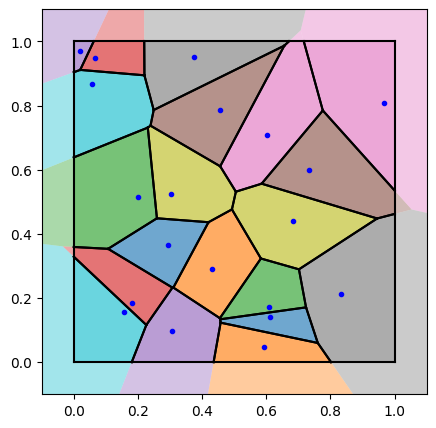

In [9]:
plt.figure(figsize=(10, 5))

plt.plot(points[:, 0], points[:, 1], 'b.')
for region in vor_extended.regions:
    if not -1 in region:
        polygon = [vor_extended.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.4)

for reg in vertices_regions_inside:
    reg = np.array(reg)  # Ensure points is a NumPy array
    hull = ConvexHull(reg)
    for simplex in hull.simplices:
        plt.plot(reg[simplex, 0], reg[simplex, 1], 'black')
    plt.fill(reg[hull.vertices, 0], reg[hull.vertices, 1], alpha=0.4, label='Convex Hull')


plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal', adjustable='box')


In [10]:
volume = [
    ConvexHull(region).volume for region in vertices_regions_inside
]

## Histogramme volume (metrics)

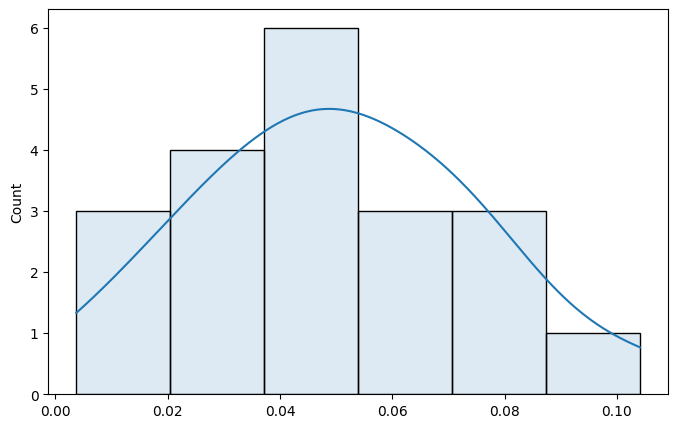

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(volume, kde=True, alpha=0.15)
plt.show()


# Main program

In [58]:
import tqdm as tqdm

def volume_voronoi(points, dim):
    ref_far_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)
        
    scaled_reference = 4*np.sqrt(dim) # have to be farther than the points inside the [0,1]^dim : > sqrt(dim)
    ref_far_points *= scaled_reference
    ref_far_points -= scaled_reference/2

    extended_points = np.vstack([points, ref_far_points])
    
    vor_extended = Voronoi(extended_points)

    hypercube_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)

    hull_hypercube = ConvexHull(hypercube_points)
    A_hypercube = hull_hypercube.equations[:, :-1]
    b_hypercube = -hull_hypercube.equations[:, -1]

    def is_arr_include(arr_check, arr_ref):
        return all(any(np.array_equal(array, item) for item in arr_ref) for array in arr_check)
    
    def V_representation(A, b):
        points = []
        for comb in combinations(range(len(A)), dim):
            A_sub = A[list(comb)]
            b_sub = b[list(comb)]
            try:
                point = np.linalg.solve(A_sub, b_sub)
                if np.all(A @ point <= b + 1e-5): # ! tolerance
                    points.append(point)
            except np.linalg.LinAlgError:
                continue
        return np.array(points)
    
    vertices_regions_inside = []
    vertices_inside = [v for v in vor_extended.vertices if np.all(v >= 0) and np.all(v <= 1)]
    # for reg in vor_extended.regions:
    for reg in tqdm.tqdm(vor_extended.regions):
        if -1 in reg or len(reg)==0 : # ignore this reg, it not belongs to the hypercube (because ref_far points)
            continue
        
        polytope = [vor_extended.vertices[i] for i in reg]

        if is_arr_include(polytope, vertices_inside): # if the region is inside the hypercube doesn't need to compute intersection (clip)
            vertices_regions_inside.append(polytope)
            continue

        hull = ConvexHull(polytope)
        A = hull.equations[:, :-1]
        b = -hull.equations[:, -1]

        A_combined = np.vstack([A, A_hypercube])
        b_combined = np.hstack([b, b_hypercube])

        points_inter = V_representation(A_combined, b_combined)
        vertices_regions_inside.append(points_inter)
        
    return [ConvexHull(region).volume for region in vertices_regions_inside]



## Compute volume acc. to distribution of points

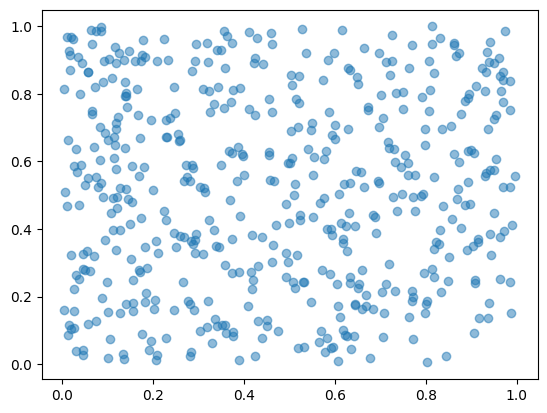

In [13]:
np.random.seed(42)
points_uniform = np.random.rand(500, 2)
plt.scatter(points_uniform[:, 0], points_uniform[:, 1], alpha=0.5)

In [14]:
volume_uniform = volume_voronoi(points_uniform, 2)

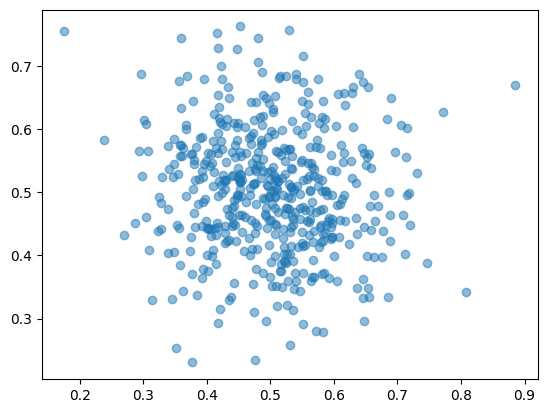

In [15]:
num_points = 500

mean_x, mean_y = 0.5, 0.5
std_x, std_y = 0.1, 0.1

np.random.seed(42)
points_x = np.random.randn(num_points) * std_x + mean_x
points_y = np.random.randn(num_points) * std_y + mean_y

plt.scatter(points_x, points_y, alpha=0.5)

points_normal = np.column_stack((points_x, points_y))

In [16]:
volume_normal = volume_voronoi(points_normal, 2)

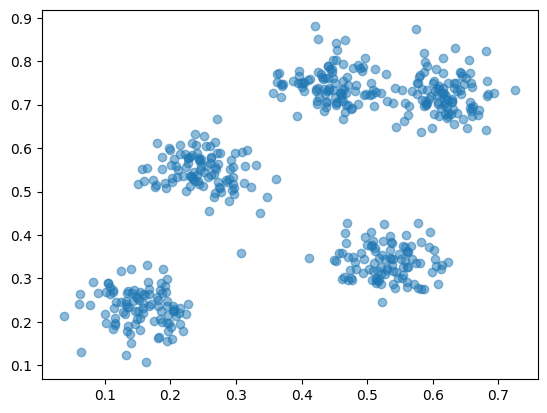

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

num_points = 500
num_clusters = 5
cluster_centers = np.random.rand(num_clusters, 2)*0.7 + 0.15

std_dev = 0.04


points_clusters = []
for center in cluster_centers:
    cluster_points = np.random.randn(num_points // num_clusters, 2) * std_dev + center
    points_clusters.append(cluster_points)

points_clusters = np.vstack(points_clusters)

# Tracer les points
plt.scatter(points_clusters[:, 0], points_clusters[:, 1], alpha=0.5)


In [18]:
volume_clusters = volume_voronoi(points_clusters, 2)

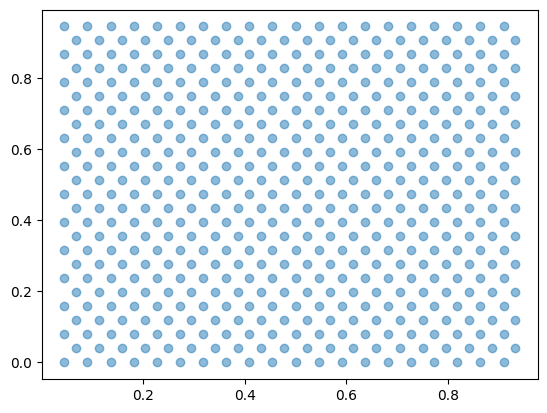

In [19]:
num_points = 500
num_cols = int(np.sqrt(num_points))
num_rows = int(num_points / num_cols)+3

spacing = 1 / num_cols
points_regular = []
for i in range(num_rows):
    for j in range(1, num_cols-1):
        x = j * spacing + (i % 2) * spacing / 2
        y = i * (spacing * np.sqrt(3) / 2)
        if x < 1 and y < 1:
            points_regular.append((x, y))

points_regular = np.array(points_regular)
plt.scatter(points_regular[:, 0], points_regular[:, 1], alpha=0.5)


In [20]:
volume_regular = volume_voronoi(points_regular, 2)

## beta

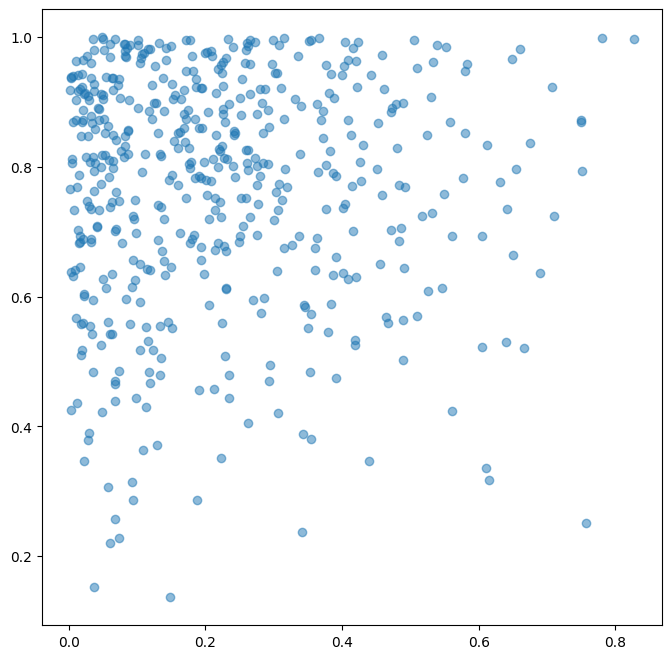

In [41]:
num_points = 500
alpha, beta = 1, 3.5

np.random.seed(42)
x_beta = np.random.beta(alpha, beta, num_points)
y_beta = np.random.beta(beta, alpha, num_points)

plt.figure(figsize=(8, 8))
plt.scatter(x_beta, y_beta, alpha=0.5)
plt.show()

points_beta_1 = np.column_stack((x_beta, y_beta))


In [43]:
volume_beta_1 = volume_voronoi(points_beta_1, 2)

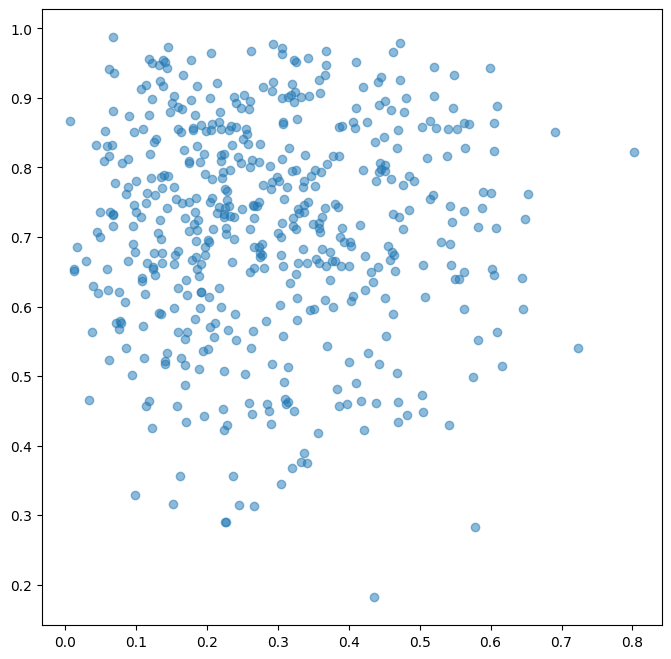

In [38]:
num_points = 500
alpha, beta = 2, 5

np.random.seed(42)
x_beta = np.random.beta(alpha, beta, num_points)
y_beta = np.random.beta(beta, alpha, num_points)

plt.figure(figsize=(8, 8))
plt.scatter(x_beta, y_beta, alpha=0.5)
plt.show()

points_beta_2 = np.column_stack((x_beta, y_beta))

In [44]:
volume_beta_2 = volume_voronoi(points_beta_2, 2)

### Coverage beta

In [39]:
from volume import covered_space_bound

params = {
    "max_depth": 4,
    "same_sphere_tol": 1e-3
}
radius = 0.025

In [42]:
coverage_beta1 = covered_space_bound(points_beta_1, radius, params, dim)
coverage_beta2 = covered_space_bound(points_beta_2, radius, params, dim)

Volume calculated. Lower bound : 0.3475017760140639 - Upper bound : 0.34986506954975816


## real examples (R2, parEGO : GP & tent)

In [48]:
import pandas as pd

data_GP = pd.read_csv("data\env_parEGO_GP\increased_data.csv")
data_tent = pd.read_csv("data\env_parEGO_tent\increased_data.csv")


points_GP = data_GP[['r_ext_pAl','pAl_richness']][data_GP['quality']=='interest']
points_tent = data_tent[['r_ext_pAl','pAl_richness']][data_tent['quality']=='interest']

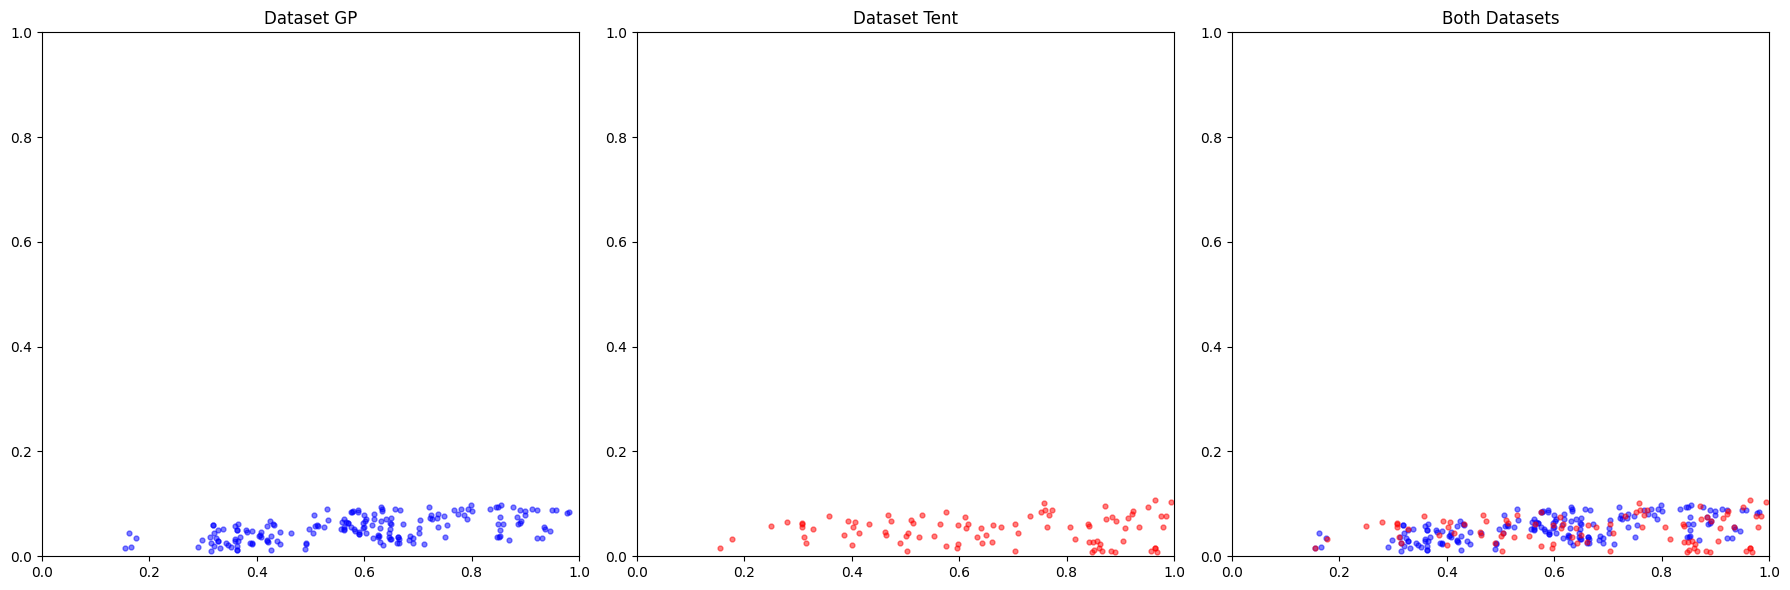

In [87]:
ig, axs = plt.subplots(1, 3, figsize=(18, 6))

# First subplot
axs[0].plot(points_GP['r_ext_pAl'], points_GP['pAl_richness'], 'b.', alpha=0.5, markersize=7)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Dataset GP')

# Second subplot
axs[1].plot(points_tent['r_ext_pAl'], points_tent['pAl_richness'], 'r.', alpha=0.5, markersize=7)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('Dataset Tent')

# Third subplot
axs[2].plot(points_GP['r_ext_pAl'], points_GP['pAl_richness'], 'b.', alpha=0.5, markersize=7)
axs[2].plot(points_tent['r_ext_pAl'], points_tent['pAl_richness'], 'r.', alpha=0.5, markersize=7)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('Both Datasets')

# Display the plot
plt.tight_layout()
plt.show()

In [57]:
coverage_GP = covered_space_bound(points_GP, radius, params, dim)
coverage_tent = covered_space_bound(points_tent, radius, params, dim)

Volume calculated. Lower bound : 0.06848380969427972 - Upper bound : 0.06886640123753672
Volume calculated. Lower bound : 0.07038230060800356 - Upper bound : 0.07088635191621682


In [58]:
vol_vor_GP = volume_voronoi(points_GP, 2)
vol_vor_tent = volume_voronoi(points_tent, 2)

In [97]:
n_samples = len(data_GP) # or data_tent


vol_vor_GP_aj = vol_vor_GP/( (n_samples - data_GP['quality'].value_counts()['interest'])**2 )
vol_vor_tent_aj = vol_vor_tent/( (n_samples - data_tent['quality'].value_counts()['interest'])**2 )

No handles with labels found to put in legend.


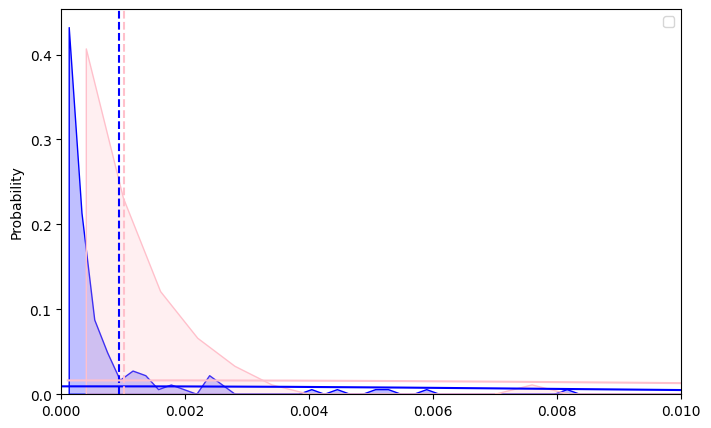

In [90]:
def plot_max_kde(color):
    kde_line = ax.lines[-1]
    kde_x = kde_line.get_xdata()
    kde_y = kde_line.get_ydata()

    max_kde_position = kde_x[np.argmax(kde_y)]
    plt.axvline(x=max_kde_position, color=color, linestyle='--')
    return max_kde_position


plt.figure(figsize=(8, 5))

ax = sns.histplot(vol_vor_GP, kde=True, alpha=0.25, color='blue', element='poly', stat='probability')
plot_max_kde('blue')

ax = sns.histplot(vol_vor_tent, kde=True, alpha=0.25, color='pink', element='poly', stat='probability')
plot_max_kde('pink')


# plt.axvline(x=mean_value, color='black', label='Mean of Regular')

plt.xlim(0, 0.01)

plt.legend()
plt.show()

No handles with labels found to put in legend.


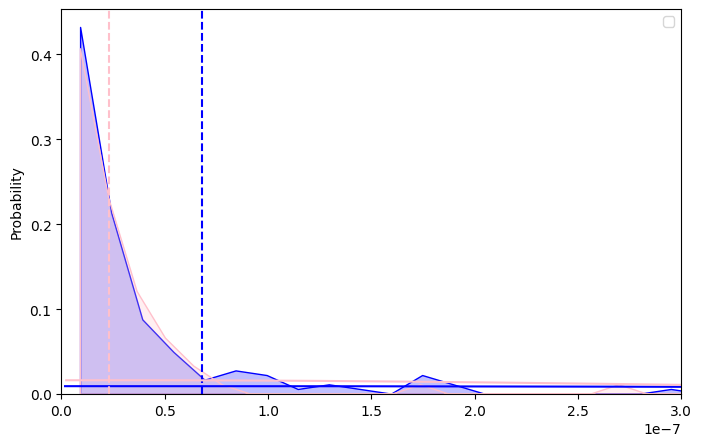

In [107]:
def plot_max_kde(color):
    kde_line = ax.lines[-1]
    kde_x = kde_line.get_xdata()
    kde_y = kde_line.get_ydata()

    max_kde_position = kde_x[np.argmax(kde_y)]
    plt.axvline(x=max_kde_position, color=color, linestyle='--')
    return max_kde_position


plt.figure(figsize=(8, 5))

ax = sns.histplot(vol_vor_GP_aj, kde=True, alpha=0.25, color='blue', element='poly', stat='probability')
plot_max_kde('blue')

ax = sns.histplot(vol_vor_tent_aj, kde=True, alpha=0.25, color='pink', element='poly', stat='probability')
plot_max_kde('pink')

plt.xlim(0, 0.0000003)

plt.legend()
plt.show()

# TODO : comparer par rapport à la distance optimale

flemme faut regarder empilement hyper-sphère n dimension & voir forum siça n'a pas déjà été calculé.

## Histogramme all volumes

In [45]:
max_vol_uniform = max(volume_uniform)
mean_value = np.mean(volume_regular)

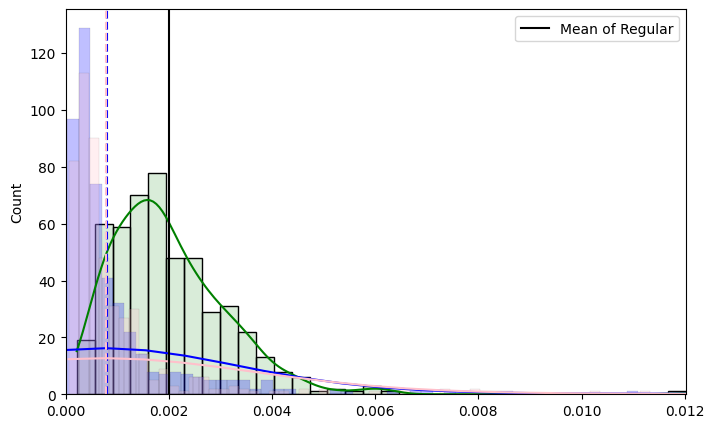

In [86]:
def plot_max_kde(color):
    kde_line = ax.lines[-1]
    kde_x = kde_line.get_xdata()
    kde_y = kde_line.get_ydata()

    max_kde_position = kde_x[np.argmax(kde_y)]
    plt.axvline(x=max_kde_position, color=color, linestyle='--')
    return max_kde_position



plt.figure(figsize=(8, 5))

sns.histplot(volume_uniform, kde=True, alpha=0.15, color="green")
# sns.histplot(volume_normal, kde=True, alpha=0.25, color='purple')
# sns.histplot(volume_clusters, kde=True, alpha=0.25, color='orange')

ax = sns.histplot(volume_beta_1, kde=True, alpha=0.25, color='blue')
plot_max_kde('blue')

ax = sns.histplot(volume_beta_2, kde=True, alpha=0.25, color='pink')
plot_max_kde('pink')




plt.axvline(x=mean_value, color='black', label='Mean of Regular')

plt.xlim(0, max(volume_uniform))

plt.legend()
plt.show()

# Main upgrade function

In [1710]:
import tqdm as tqdm
tol=1e-3

def volume_voronoi_upgrade(points, dim, tol=1e-3):
    ref_far_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)
        
    scaled_reference = 10*np.sqrt(dim) # have to be farther than the points inside the [0,1]^dim : > sqrt(dim)
    ref_far_points *= scaled_reference
    ref_far_points -= scaled_reference/2

    extended_points = np.vstack([points, ref_far_points])
    
    vor_extended = Voronoi(extended_points)

    hypercube_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)


    def intersect_hypercube(point1, point2):
        intersections = []
        for i in range(dim):
            if abs(point1[i] - point2[i]) > tol:
                t = (0-point1[i]) / (point2[i]-point1[i])
                if 0 < t < 1:
                    intersection = point1 + t*(point2-point1)
                    if np.all(intersection > 0-tol) and np.all(intersection < 1+tol):
                        intersections.append(intersection)
                t = (1 - point1[i]) / (point2[i]-point1[i])
                if 0 < t < 1:
                    intersection = point1 + t*(point2-point1)
                    if np.all(intersection > 0-tol) and np.all(intersection < 1+tol):
                        intersections.append(intersection)
        # return np.unique(np.vstack(intersections)) if len(intersections) > 0 else np.array([])
        return intersections
    
    def is_arr_include(arr_check, arr_ref):
        return all(any(np.array_equal(array, item) for item in arr_ref) for array in arr_check)

    vertices_regions_inside = []
    vertices_inside = [v for v in vor_extended.vertices if np.all(v >= 0-tol) and np.all(v <= 1+tol)]

  
    for reg in vor_extended.regions:
        if -1 in reg or len(reg)==0 : # ignore this reg, it not belongs to the hypercube (because ref_far points)
            continue
        
        polytope = [vor_extended.vertices[i] for i in reg]

        if is_arr_include(polytope, vertices_inside): # if the region is inside the hypercube doesn't need to compute intersection (clip)
            vertices_regions_inside.append(polytope)
            continue

        # delaunay = Delaunay(polytope)
        # for p in hypercube_points:
        #     if delaunay.find_simplex(p)>=0:
        #         polytope.append(p)
        num_vertices = len(polytope)
        c = np.zeros(num_vertices)
        A = np.vstack((np.array(polytope).T, np.ones(num_vertices)))
        for p in hypercube_points:
            b = np.append(p, 1)
            res = linprog(c, A_eq=A, b_eq=b, bounds=(0, None))
            if res.success and np.all(res.x >= 0):
                polytope.append(p)


        all_intersections = []
        for ridge in vor_extended.ridge_vertices:
            valid_ridge = [v for v in ridge if v != -1 and v in reg]
            if len(valid_ridge) > 1:
                for simplex in itertools.combinations(valid_ridge, 2):
                    point1, point2 = vor_extended.vertices[simplex[0]], vor_extended.vertices[simplex[1]]
                    inter_points = intersect_hypercube(point1, point2)
                    if inter_points:
                        all_intersections.extend(inter_points)

        
        if len(all_intersections) > 0:
            pol = np.vstack([polytope, np.vstack(all_intersections)])
        else:
            pol = np.vstack([polytope])
        pol = pol[(pol > 0-tol).all(axis=1) & (pol < 1+tol).all(axis=1)]
        vertices_regions_inside.append(pol)

    def distance(p1, p2):
        return np.linalg.norm(np.array(p1) - np.array(p2))

    def filter(points, threshold=1e-5):
        filtered_points = []
        for point in points:
            if not filtered_points or all(distance(point, fp) > threshold for fp in filtered_points):
                filtered_points.append(np.round(point, int(-np.log10(threshold))) )
                
        return np.array(filtered_points)

    # vertices_regions_inside = filter(vertices_regions_inside)
    for i,region in enumerate(vertices_regions_inside):
        vertices_regions_inside[i] = filter(region, 1e-5)
    # print(sum(arr.shape[0] for arr in vertices_regions_inside))   
    # return [ConvexHull(region,  qhull_options='Q12 Qs QbB Qc').volume for region in tqdm.tqdm(vertices_regions_inside)]
    # volumes = []
    # for region in tqdm.tqdm(vertices_regions_inside):
    #     try:
    #         volumes.append(ConvexHull(region,  qhull_options='Q12 Qs Qc').volume)
    #     except:
    #         print(region)
    #         continue
    # return volumes
    return [ConvexHull(reg, qhull_options='Q12').volume for reg in vertices_regions_inside]


# Voronoi upgrade 3D

In [1085]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi, Delaunay
import plotly.graph_objs as go
import plotly.io as pio

# Set the random seed and dimension
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

tol = 1e-3
dim = 3
points = np.random.rand(50, dim)

In [1086]:
ref_far_points = np.array([
    [(i >> j) & 1 for j in range(dim)] for i in range(2**dim)
], dtype=float)

scaled_reference = 10 * np.sqrt(dim)
ref_far_points *= scaled_reference
ref_far_points -= scaled_reference / 2

extended_points = np.vstack([points, ref_far_points])

vor_extended = Voronoi(extended_points)

In [1087]:
def intersect_hypercube(point1, point2):
    intersections = []
    for i in range(dim):
        if abs(point1[i] - point2[i]) > tol:
            t = (0-point1[i]) / (point2[i]-point1[i])
            if 0 < t < 1:
                intersection = point1 + t*(point2-point1)
                if np.all(intersection >= 0-tol) and np.all(intersection <= 1+tol):
                    intersections.append(intersection)
            t = (1 - point1[i]) / (point2[i]-point1[i])
            if 0 < t < 1:
                intersection = point1 + t*(point2-point1)
                if np.all(intersection >= 0-tol) and np.all(intersection <= 1+tol):
                    intersections.append(intersection)
    # return np.unique(np.vstack(intersections)) if len(intersections) > 0 else np.array([])
    return intersections

# Function to check if an array is included in another array
def is_arr_include(arr_check, arr_ref):
    return all(any(np.array_equal(array, item) for item in arr_ref) for array in arr_check)


In [1088]:
hypercube_points = np.array([ # dim-hypercube side 1 on positive side of R^dim 
    np.array(
        [(i>>j) & 1 for j in range(dim)]) for i in range(2**dim)
    ], dtype=float)


In [1089]:
from scipy.optimize import linprog
import itertools
# Find vertices inside the hypercube
vertices_regions_inside = []
vertices_inside = [v for v in vor_extended.vertices if np.all(v >= 0-tol) and np.all(v <= 1+tol)]

for reg in vor_extended.regions:
    if -1 in reg or len(reg)==0:
        continue
    polytope = [vor_extended.vertices[i] for i in reg]
    if is_arr_include(polytope, vertices_inside):
        vertices_regions_inside.append(polytope)
        continue

    delaunay = Delaunay(polytope)
    for p in hypercube_points:
        if delaunay.find_simplex(p)>=0: # ! tol high
            polytope.append(p)
    # num_vertices = len(polytope)
    # c = np.zeros(num_vertices)
    # A = np.vstack((np.array(polytope).T, np.ones(num_vertices)))
    # for p in hypercube_points:
    #     b = np.append(p, 1)
    #     res = linprog(c, A_eq=A, b_eq=b, bounds=(0, None), options={"tol": 1})
    #     if res.success and np.all(res.x >= 0):
    #         polytope.append(p)
 

    all_intersections = []
    # for ridge in vor_extended.ridge_vertices:
    #     if all(v in reg for v in ridge):
    #         simplex = [vor_extended.vertices[v] for v in ridge]
            # inter_points = intersect_hypercube(s
            # # if inter_points.shape[0] > 0:
            # if inter_points:
            #     all_intersections.extend(np.array([inter_points]))
    # for simplex in itertools.combinations(polytope, 2):
    #     # if (not np.all(simplex[0] >= 0-tol) or not np.all(simplex[0] <= 1+tol)) and (np.all(simplex[1] >= 0-tol) and np.all(simplex[1] <= 1+tol)):
    #     #     continue
    #     inter_points = intersect_hypercube(simplex[0], simplex[1])
    #     if inter_points:
    #         all_intersections.extend(inter_points)
    for ridge in vor_extended.ridge_vertices:
        valid_ridge = [v for v in ridge if v != -1 and v in reg]
        if len(valid_ridge) >= 2:
            for simplex in itertools.combinations(valid_ridge, 2):
                point1, point2 = vor_extended.vertices[simplex[0]], vor_extended.vertices[simplex[1]]
                inter_points = intersect_hypercube(point1, point2)
                if inter_points:
                    all_intersections.extend(inter_points)
    # hull = ConvexHull(polytope)
    # for simplex in hull.simplices:
    #         point1, point2 = polytope[simplex[0]], polytope[simplex[1]]
    #         inter_points = intersect_hypercube(point1, point2)
    #         if inter_points:
    #             all_intersections.extend(inter_points)


    # polytope_much_points = np.vstack([polytope, np.vstack(all_intersections)]) if len(all_intersections) > 0 else np.vstack([polytope])
    # polytope_truncated = polytope_much_points[(polytope_much_points >= 0).all(axis=1) & (polytope_much_points <= 1).all(axis=1)]
    # vertices_regions_inside.append(polytope_truncated)
    if len(all_intersections) > 0:
        pol = np.vstack([polytope, np.vstack(all_intersections)])
    else:
        pol = np.vstack([polytope])
    pol = pol[(pol >= 0-tol).all(axis=1) & (pol <= 1+tol).all(axis=1)]
    vertices_regions_inside.append(pol)


In [1090]:
fig = go.Figure()

# Plot original points
fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2],
                           mode='markers', marker=dict(size=2, color='blue')))

fig.add_trace(go.Scatter3d(x=vor_extended.vertices[:, 0], y=vor_extended.vertices[:, 1], z=vor_extended.vertices[:, 2],
                           mode='markers', marker=dict(size=2, color='red')))

fig.add_trace(go.Scatter3d(x=np.vstack(vertices_regions_inside)[:, 0], y=np.vstack(vertices_regions_inside)[:, 1], z=np.vstack(vertices_regions_inside)[:, 2],
                           mode='markers', marker=dict(size=2, color='green')))


i=0
for region in vertices_regions_inside:
    i+=1
    region = np.array(region) 
    try:
        hull = ConvexHull(region)
        region = np.vstack([region, region[0]])  # Ensure the polygon is closed
        simplices = hull.simplices
        fig.add_trace(go.Mesh3d(
            x=region[:, 0], y=region[:, 1], z=region[:, 2],
            i=simplices[:, 0], j=simplices[:, 1], k=simplices[:, 2],
            color=f'rgba({i*100}, 100, {i%2 * 100}, 0.3)', opacity=0.4, showscale=False
        ))
    except:
        continue

# Layout settings
fig.update_layout(scene=dict(
    xaxis=dict(nticks=10, range=[-.1, 1.1]),
    yaxis=dict(nticks=10, range=[-.1, 1.1]),
    zaxis=dict(nticks=10, range=[-.1, 1.1]),
    aspectratio=dict(x=1, y=1, z=1)
))

pio.show(fig)

In [1110]:
volume = [ConvexHull(reg, qhull_options='Q12').volume for reg in vertices_regions_inside]

# Approximation simple

In [1416]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
import pandas as pd

In [1506]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
dim = 4
points = np.random.rand(50, dim)

In [1507]:
vor = Voronoi(points)
vor_red = Voronoi(points)

In [1508]:
bounds = [(0, 1) for _ in range(vor_red.vertices.shape[1])]  # [(min_dim1, max_dim1), (min_dim2, max_dim2), ...]

# Function to check if a point is inside the bounds
def in_bounds(point, bounds):
    return all(bounds[d][0] <= point[d] <= bounds[d][1] for d in range(len(bounds)))

# Modify Voronoi regions
new_regions = []
for region in vor_red.regions:
    new_region = []
    for vertex in region:
        if vertex == -1 or not in_bounds(vor_red.vertices[vertex], bounds):
            new_region.append(-1)
        else:
            new_region.append(vertex)
    new_regions.append(new_region)

# Update Voronoi regions
vor_red.regions = new_regions

In [1510]:
volumes = []
for region in vor_red.regions:
    if not -1 in region and len(region) > 0:  # Ensure the region is not empty
        polygon = [vor_red.vertices[i] for i in region]
        if len(polygon) > vor_red.vertices.shape[1]:  # Ensure there are enough points to form a convex hull
            hull = ConvexHull(polygon)
            volumes.append(hull.volume)
volumes = np.array(volumes)

In [1511]:
np.sum(volumes)

0.021459940808285494

In [1512]:
bounds = [(0, 1) for _ in range(vor.vertices.shape[1])]  # [(min_dim1, max_dim1), (min_dim2, max_dim2), ...]

In [1513]:
# for each region in vor_red.regions with -1, compute the min distance to the hypercube about point (this defining the region cell)

def distance_to_hypercube(point, bounds):

    for i in range(len(bounds)):
        mid = (bounds[i][0] + bounds[i][1]) / 2
        if point[i] < mid:
            return (point[i] - bounds[i][0])**2
        elif point[i] > mid:
            return (point[i] - bounds[i][1])**2
        else:
            return len(bounds)*0.5**2


min_dist = []
for point_idx, region_idx in enumerate(vor_red.point_region):
    vertices = vor_red.regions[region_idx]
    if -1 in vertices:  
        point = points[point_idx]
        min_dist.append(distance_to_hypercube(point, bounds))
min_dist = np.array(min_dist)
        

In [1514]:
sum = np.sum(min_dist)
ratio = min_dist / sum

In [1515]:
appr_volume = ratio*(1-np.sum(volumes))

In [1516]:
all_volumes = np.append(volumes, appr_volume)

In [1519]:
real_vol = volume_voronoi_upgrade(points, 4)

(array([12.,  5.,  3.,  1.,  2.,  0.,  4.,  0.,  2.,  4.,  0.,  4.,  0.,
         1.,  1.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,
         1.,  1.,  2.]),
 array([0.        , 0.00226102, 0.00452204, 0.00678305, 0.00904407,
        0.01130509, 0.01356611, 0.01582713, 0.01808815, 0.02034916,
        0.02261018, 0.0248712 , 0.02713222, 0.02939324, 0.03165426,
        0.03391527, 0.03617629, 0.03843731, 0.04069833, 0.04295935,
        0.04522037, 0.04748138, 0.0497424 , 0.05200342, 0.05426444,
        0.05652546, 0.05878648, 0.06104749, 0.06330851, 0.06556953]),
 <BarContainer object of 29 artists>)

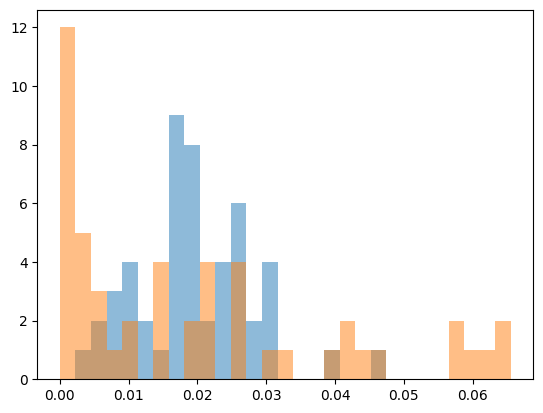

In [1521]:
# seaborn histogramme plt.hist(real_vol)
# plt.hist(all_volumes)

bins = np.linspace(0, max(max(real_vol), max(all_volumes)), 30)

plt.hist(real_vol, bins=bins, alpha=0.5)
plt.hist([x for x in all_volumes], bins=bins, alpha=0.5)


In [1522]:
len(appr_volume)

49

Ca ne peut pas fonctionner : 

- Plus + la dimension est haute - de regions dans l'hypercubes sont définies (50 points, dim 4 : 1 seule region...) 

- Considérer les volumes manquants seulement à partir de la position du points de la cellule approxime vraiment mal !

# Numba Updgrade Voronoi

In [2]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi, Delaunay
import plotly.graph_objs as go
import plotly.io as pio
import tqdm as tqdm
from numba import njit


# Set the random seed and dimension
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

tol = 1e-5
dim = 4
points = np.random.rand(50, dim)

In [4]:
import numpy as np
from scipy.spatial import Voronoi, ConvexHull
from scipy.optimize import linprog
import itertools
from numba import njit

@njit(fastmath=True)
def intersect_hypercube(point1, point2, dim, tol):
    intersections = np.empty((2*dim, dim), dtype=np.float64)
    count = 0
    for i in range(dim):
        diff = point2[i] - point1[i]
        if abs(diff) > tol:
            for bound in (0, 1):
                t = (bound - point1[i]) / diff
                if 0 < t < 1:
                    intersection = point1 + t * (point2 - point1)
                    if np.all(intersection > -tol) and np.all(intersection < 1 + tol):
                        intersections[count] = intersection
                        count += 1
    return intersections[:count]

@njit
def is_arr_include(arr_check, arr_ref):
    for array in arr_check:
        found = False
        for item in arr_ref:
            if np.array_equal(array, item):
                found = True
                break
        if not found:
            return False
    return True

@njit(fastmath=True)
def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

@njit
def filter(points, threshold, dim):
    num_points = len(points)
    filtered_points = np.empty((num_points, dim), dtype=np.float64)
    count = 0
    threshold_power = int(-np.log10(threshold))

    for i in range(num_points):
        point = np.round(points[i], threshold_power)
        add_point = True
        for j in range(count):
            if distance(point, filtered_points[j]) < threshold:
                add_point = False
                break
        if add_point:
            filtered_points[count] = point
            count += 1

    return filtered_points[:count]

def volume_voronoi_upgrade_numba(points, dim, tol=1e-3):
    ref_far_points = np.array([
        np.array([(i >> j) & 1 for j in range(dim)]) for i in range(2 ** dim)
    ], dtype=float)

    scaled_reference = 100 * np.sqrt(dim)
    ref_far_points *= scaled_reference
    ref_far_points -= scaled_reference / 2

    extended_points = np.vstack([points, ref_far_points])
    vor_extended = Voronoi(extended_points)

    hypercube_points = np.array([
        np.array([(i >> j) & 1 for j in range(dim)]) for i in range(2 ** dim)
    ], dtype=float)

    vertices_regions_inside = []
    vertices_inside = [v for v in vor_extended.vertices if np.all(v >= 0 - tol) and np.all(v <= 1 + tol)]

    for reg in vor_extended.regions:
        if -1 in reg or len(reg) == 0:
            continue

        polytope = [vor_extended.vertices[i] for i in reg]

        if is_arr_include(np.array(polytope), np.array(vertices_inside)):
            vertices_regions_inside.append(polytope)
            continue

        num_vertices = len(polytope)
        c = np.zeros(num_vertices)
        A = np.vstack((np.array(polytope).T, np.ones(num_vertices)))
        for p in hypercube_points:
            b = np.append(p, 1)
            res = linprog(c, A_eq=A, b_eq=b, bounds=(0, None))
            if res.success and np.all(res.x >= 0):
                polytope.append(p)

        all_intersections = np.empty((0, dim), dtype=np.float64)
        for ridge in vor_extended.ridge_vertices:
            valid_ridge = np.array([v for v in ridge if v != -1 and v in reg])
            if len(valid_ridge) > 1:
                for simplex in itertools.combinations(valid_ridge, 2):
                    point1, point2 = vor_extended.vertices[simplex[0]], vor_extended.vertices[simplex[1]]
                    inter_points = intersect_hypercube(point1, point2, dim, tol)
                    if inter_points.size > 0:
                        all_intersections = np.vstack((all_intersections, inter_points))

        polytope = np.array(polytope)
        polytope = polytope[(polytope > 0 - tol).all(axis=1) & (polytope < 1 + tol).all(axis=1)]
        if len(all_intersections) > 0:
            pol = np.vstack([polytope, np.vstack(all_intersections)])
        else:
            pol = np.vstack([polytope])
        vertices_regions_inside.append(pol)

    for i, region in enumerate(vertices_regions_inside):
        vertices_regions_inside[i] = filter(np.array(region), tol, dim)

    return [ConvexHull(reg, qhull_options='Q12 Qc Qs').volume for reg in vertices_regions_inside]



In [10]:
# generate clusters points belong to [0,1]^dim in the corner of hypercube
# generate clusters, rmeove pointsoutsidehypercube and add unifrom points

import numpy as np

def generate_clusters(n_clusters, n_points, dim, cluster_size=0.05):
    clusters = []
    for _ in range(n_clusters):
        cluster_center = np.random.rand(dim)
        cluster = cluster_center + cluster_size * np.random.randn(n_points, dim)
        clusters.append(cluster)
    return np.vstack(clusters)

def remove_points_outside_hypercube(points):
    return points[(points >= 0).all(axis=1) & (points <= 1).all(axis=1)]

def add_uniform_points(clusters, n_points, dim):
    uniform_points = np.random.rand(n_points - len(clusters), dim)
    return np.vstack([clusters, uniform_points])

n_clusters = 1
n_points = 50
dim = 4
np.random.seed(40)
clusters = generate_clusters(n_clusters, n_points, dim)
clusters = remove_points_outside_hypercube(clusters)
points_clusters = add_uniform_points(clusters, n_points, dim)


In [12]:
# # plt.scatter(points[:, 0], points[:, 1])
# plt.xlim(0, 1)
# plt.ylim(0,1)

#plot for 3D

import plotly.graph_objs as go
import plotly.io as pio


fig = go.Figure()

fig.add_trace(go.Scatter3d(x=points_clusters[:, 0], y=points_clusters[:, 1], z=points_clusters[:, 2],
                           mode='markers', marker=dict(size=2, color='blue')))
fig.update_layout(scene=dict(
    xaxis=dict(nticks=10, range=[0, 1]),
    yaxis=dict(nticks=10, range=[0, 1]),
    zaxis=dict(nticks=10, range=[0, 1]),
    aspectratio=dict(x=1, y=1, z=1)
))

In [13]:
vol_clusters = volume_voronoi_upgrade_numba(points_clusters, dim)

(array([43.,  1.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  2.]),
 array([3.13709225e-06, 2.18437526e-02, 4.36843682e-02, 6.55249838e-02,
        8.73655993e-02, 1.09206215e-01, 1.31046830e-01, 1.52887446e-01,
        1.74728062e-01, 1.96568677e-01, 2.18409293e-01]),
 <BarContainer object of 10 artists>)

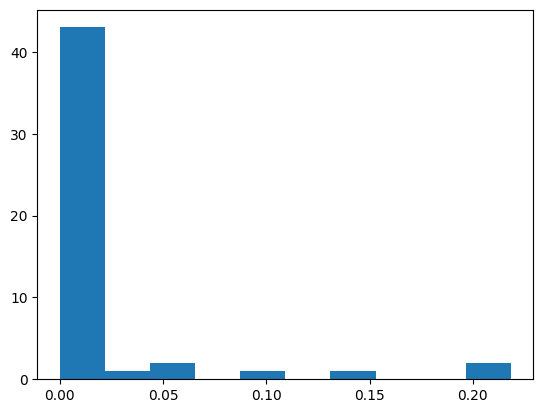

In [17]:
import matplotlib.pyplot as plt


plt.hist(vol_clusters)

# Main upgrade numba version optimisée

In [1]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi, Delaunay
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
import pandas as pd
from numba import njit
from scipy.optimize import linprog
import itertools

In [144]:
@njit(fastmath=True)
def intersect_hypercube(point1, point2, dim, tol):
    intersections = np.empty((2*dim, dim), dtype=np.float64)
    count = 0
    for i in range(dim):
        diff = point2[i] - point1[i]
        if abs(diff) > tol: # Not parallel to the hypercube face
            for bound in (0, 1): 
                t = (bound - point1[i]) / diff 
                if 0-tol < t < 1+tol:
                    intersection = point1 + t * (point2 - point1)
                    if np.all(intersection > -tol) and np.all(intersection < 1 + tol):
                        intersections[count] = intersection
                        count += 1
    return intersections[:count]

@njit
def is_arr_include(arr_check, arr_ref):
    for array in arr_check:
        found = False
        for item in arr_ref:
            if np.array_equal(array, item):
                found = True
                break
        if not found:
            return False
    return True

@njit(fastmath=True)
def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

@njit
def filter(points, threshold, dim):
    num_points = len(points)
    filtered_points = np.empty((num_points, dim), dtype=np.float64)
    count = 0
    threshold_power = int(-np.log10(threshold))

    for i in range(num_points):
        point = np.round(points[i], threshold_power)
        add_point = True
        for j in range(count):
            if distance(point, filtered_points[j]) < threshold:
                add_point = False
                break
        if add_point:
            filtered_points[count] = point
            count += 1

    return filtered_points[:count]

def volume_voronoi_upgrade_numba_end(points, dim, tol=1e-3, isFilter: bool=True):
    # Add far points to assure interesting regions are not infinite
    ref_far_points = np.array([
        np.array([(i >> j) & 1 for j in range(dim)]) for i in range(2 ** dim)
    ], dtype=float)

    scaled_reference = 4 * np.sqrt(dim)
    ref_far_points *= scaled_reference
    ref_far_points -= scaled_reference / 2

    extended_points = np.vstack([points, ref_far_points])
    vor_extended = Voronoi(extended_points) # Get the Voronoi diagram

    hypercube_points = np.array([ # Get the hypercube points
        np.array([(i >> j) & 1 for j in range(dim)]) for i in range(2 ** dim)
    ], dtype=float)

    vertices_regions_inside = [] # List of vertices defining the regions inside the hypercube
    vertices_inside = np.array([v for v in vor_extended.vertices if np.all(v > 0 - tol) and np.all(v < 1 + tol)], dtype=np.float64)

    for reg in vor_extended.regions: 
        if -1 in reg or len(reg) == 0: # if region is infinite or empty, ignore it
            continue

        polytope = np.array([vor_extended.vertices[i] for i in reg], dtype=np.float64)

        if is_arr_include(polytope, vertices_inside): # if the region is inside the hypercube doesn't need to compute intersection (clip)
            vertices_regions_inside.append(polytope)
            continue

        if isFilter: # advice to use it when the number of points is high : round values & remove close points
            polytope = filter(polytope, tol, dim)


        # * Add points of the hypercube inside the polytope (region) if within the region
        delaunay = Delaunay(polytope)
        for p in hypercube_points:
            if delaunay.find_simplex(p)>=0:
                polytope = np.vstack([polytope, p])
                hypercube_points = np.delete(hypercube_points, np.where((hypercube_points == p).all(axis=1)), axis=0)
        # ? Other method, maybe faster/efficient ?
        # num_vertices = len(polytope)
        # c = np.zeros(num_vertices)
        # A = np.vstack((polytope.T, np.ones(num_vertices)))
        # for p in hypercube_points:
        #     b = np.append(p, 1)
        #     res = linprog(c, A_eq=A, b_eq=b, bounds=(0, [0]*50))
        #     if res.success and np.all(res.x >= 0):
        #         polytope = np.vstack([polytope, p])

        all_intersections = np.empty((0, dim), dtype=np.float64)

        # TODO : Upgrade this part to compute smartly the intersection between the hypercube and the polytope.
        # ?      I tried to use only ridge_vertices but either I did a mistake or it's not enough to compute the intersection ! 
        # ?      Set small number of points with dim > 2 and look the difference between plot according to the method used
        # polytope_convexHull = ConvexHull(polytope)
        # polytope_ridge_vertices = polytope_convexHull.simplices
        # for ridge_index in polytope_ridge_vertices:
        #     point1, point2 = polytope[ridge_index[0]], polytope[ridge_index[1]]
        #     inter_points = intersect_hypercube(point1, point2, dim, tol)
        #     if inter_points.size > 0:
        #         all_intersections = np.vstack((all_intersections, inter_points))

        for ridge in vor_extended.ridge_vertices: 
            valid_ridge = np.array([v for v in ridge if v != -1 and v in reg]) # Get the valid ridge vertices in the region
            if len(valid_ridge) > 1:
                for simplex in itertools.combinations(valid_ridge, 2): # Make all combinations of the valid ridge vertices (expensive !)
                    point1, point2 = vor_extended.vertices[simplex[0]], vor_extended.vertices[simplex[1]]
                    inter_points = intersect_hypercube(point1, point2, dim, tol)
                    if inter_points.size > 0:
                        all_intersections = np.vstack((all_intersections, inter_points))
   

        polytope = polytope[(polytope > 0 - tol).all(axis=1) & (polytope < 1 + tol).all(axis=1)] # Keep only points inside the hypercube
        if len(all_intersections) > 0:
            pol = np.vstack([polytope, np.vstack(all_intersections)])
        else:
            pol = np.vstack([polytope])
        vertices_regions_inside.append(pol)

    if isFilter:
        for i, region in enumerate(vertices_regions_inside):
            vertices_regions_inside[i] = filter(region, tol, dim)


    l_volume = [ConvexHull(reg, qhull_options='Q12 Qc Qs').volume for reg in vertices_regions_inside] # Add some parameters to compute volume and avoid errors
    print("Quantity of error volume : ", 1-np.sum(l_volume) )
    return l_volume



In [139]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
dim = 3
points = np.random.rand(10, dim)

Pour plot les différentes régions, l'erreur entre les 2 méthodes pour l'intersection apparait à partir de la dim 3 d'où les plots ci-dessous.
Modifier la function volume_voronoi_upgrade_numba_end pour avoir ces sorties : vor_extended, vertices_regions_inside = volume_voronoi_upgrade_numba_end(points, dim, tol=1e-3).
Selon la méthode que vous (dé)commenter vous obtiendrez des différences pour certains régions.
Là où il y a écrit :  # ! CRA ; spécifiez la région qui vous intéresse à analyser.

In [143]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial import ConvexHull
import plotly.io as pio

fig = go.Figure()

# Plot original points
fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2],
                           mode='markers', marker=dict(size=2, color='blue')))

fig.add_trace(go.Scatter3d(x=vor_extended.vertices[:, 0], y=vor_extended.vertices[:, 1], z=vor_extended.vertices[:, 2],
                           mode='markers', marker=dict(size=2, color='red')))

fig.add_trace(go.Scatter3d(x=np.vstack(vertices_regions_inside)[:, 0], y=np.vstack(vertices_regions_inside)[:, 1], z=np.vstack(vertices_regions_inside)[:, 2],
                           mode='markers', marker=dict(size=2, color='green')))


i=0
# for region in vertices_regions_inside[n1:n2]:
#     i+=1
#     region = np.array(region) 
#     try:
#         hull = ConvexHull(region)
#         region = np.vstack([region, region[0]])  # Ensure the polygon is closed
#         simplices = hull.simplices
#         fig.add_trace(go.Mesh3d(
#             x=region[:, 0], y=region[:, 1], z=region[:, 2],
#             i=simplices[:, 0], j=simplices[:, 1], k=simplices[:, 2],
#             color=f'rgba({i*100}, 100, {i%2 * 100}, 0.3)', opacity=0.4, showscale=False
#         ))

#     except:
#         continue

for region in vor_extended.regions:
    if not -1 in region and len(region) > 0:  # Ensure the region is not empty
        polygon = [vor_extended.vertices[i] for i in region]
        fig.add_trace(go.Mesh3d(
            x=np.array(polygon)[:, 0], y=np.array(polygon)[:, 1], z=np.array(polygon)[:, 2],
            opacity=0.4, showscale=False
        ))
        # display edige for this region
        hull = ConvexHull(polygon)
        for simplex in hull.simplices:
            triangle = np.vstack([polygon[simplex[0]], polygon[simplex[1]], polygon[simplex[2]], polygon[simplex[0]]])
            fig.add_trace(go.Scatter3d(
                x=triangle[:, 0], y=triangle[:, 1], z=triangle[:, 2],
                mode='lines', line=dict(color='red', width=2)
            ))



# Display the edges of another polytope
polytope = vertices_regions_inside[1] # ! CRA
hull_polytope = ConvexHull(polytope)

# Extract the vertices that form the edges
edges = hull_polytope.simplices
for edge in edges:
    fig.add_trace(go.Scatter3d(
        x=polytope[edge, 0], y=polytope[edge, 1], z=polytope[edge, 2],
        mode='lines', line=dict(color='black', width=2)
    ))

# Layout settings
fig.update_layout(scene=dict(
    xaxis=dict(nticks=10, range=[-.1, 1.1]),
    yaxis=dict(nticks=10, range=[-.1, 1.1]),
    zaxis=dict(nticks=10, range=[-.1, 1.1]),
    aspectratio=dict(x=1, y=1, z=1)
))

pio.show(fig)


In [145]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial import ConvexHull
import plotly.io as pio

fig = go.Figure()

# Plot original points
fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2],
                           mode='markers', marker=dict(size=2, color='blue')))

fig.add_trace(go.Scatter3d(x=vor_extended.vertices[:, 0], y=vor_extended.vertices[:, 1], z=vor_extended.vertices[:, 2],
                           mode='markers', marker=dict(size=2, color='red')))

fig.add_trace(go.Scatter3d(x=np.vstack(vertices_regions_inside)[:, 0], y=np.vstack(vertices_regions_inside)[:, 1], z=np.vstack(vertices_regions_inside)[:, 2],
                           mode='markers', marker=dict(size=2, color='green')))



for region in vor_extended.regions:
    if not -1 in region and len(region) > 0:  # Ensure the region is not empty
        polygon = [vor_extended.vertices[i] for i in region]
        fig.add_trace(go.Mesh3d(
            x=np.array(polygon)[:, 0], y=np.array(polygon)[:, 1], z=np.array(polygon)[:, 2],
            opacity=0.4, showscale=False
        ))
        # display edige for this region
        hull = ConvexHull(polygon)
        for simplex in hull.simplices:
            triangle = np.vstack([polygon[simplex[0]], polygon[simplex[1]], polygon[simplex[2]], polygon[simplex[0]]])
            fig.add_trace(go.Scatter3d(
                x=triangle[:, 0], y=triangle[:, 1], z=triangle[:, 2],
                mode='lines', line=dict(color='red', width=2)
            ))


polytope = vertices_regions_inside[1]
hull_polytope = ConvexHull(polytope)


edges = hull_polytope.simplices
for edge in edges:
    fig.add_trace(go.Scatter3d(
        x=polytope[edge, 0], y=polytope[edge, 1], z=polytope[edge, 2],
        mode='lines', line=dict(color='black', width=2)
    ))

# Layout settings
fig.update_layout(scene=dict(
    xaxis=dict(nticks=10, range=[-.1, 1.1]),
    yaxis=dict(nticks=10, range=[-.1, 1.1]),
    zaxis=dict(nticks=10, range=[-.1, 1.1]),
    aspectratio=dict(x=1, y=1, z=1)
))

pio.show(fig)


# Plot metrics

In [9]:
import numpy as np
from scipy.spatial import ConvexHull, Voronoi, Delaunay
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
import pandas as pd
from numba import njit
from scipy.optimize import linprog
import itertools
import tqdm as tqdm

In [65]:
@njit(fastmath=True)
def intersect_hypercube(point1, point2, dim, tol):
    intersections = np.empty((2*dim, dim), dtype=np.float64)
    count = 0
    for i in range(dim):
        diff = point2[i] - point1[i]
        if abs(diff) > tol: # Not parallel to the hypercube face
            for bound in (0, 1): 
                t = (bound - point1[i]) / diff 
                if 0-tol < t < 1+tol:
                    intersection = point1 + t * (point2 - point1)
                    if np.all(intersection > -tol) and np.all(intersection < 1 + tol):
                        intersections[count] = intersection
                        count += 1
    return intersections[:count]

@njit
def is_arr_include(arr_check, arr_ref):
    for array in arr_check:
        found = False
        for item in arr_ref:
            if np.array_equal(array, item):
                found = True
                break
        if not found:
            return False
    return True

@njit(fastmath=True)
def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

@njit
def filter(points, threshold, dim):
    num_points = len(points)
    filtered_points = np.empty((num_points, dim), dtype=np.float64)
    count = 0
    threshold_power = int(-np.log10(threshold))

    for i in range(num_points):
        point = np.round(points[i], threshold_power)
        add_point = True
        for j in range(count):
            if distance(point, filtered_points[j]) < threshold:
                add_point = False
                break
        if add_point:
            filtered_points[count] = point
            count += 1

    return filtered_points[:count]

def volume_voronoi(points, dim, tol=1e-3, isFilter: bool=True):
    if dim>4: 
        print("The dimension is too high, the computation may take a long time !")
    # Add far points to assure interesting regions are not infinite
    ref_far_points = np.array([
        np.array([(i >> j) & 1 for j in range(dim)]) for i in range(2 ** dim)
    ], dtype=float)

    scaled_reference = 4 * np.sqrt(dim)
    ref_far_points *= scaled_reference
    ref_far_points -= scaled_reference / 2

    extended_points = np.vstack([points, ref_far_points])
    vor_extended = Voronoi(extended_points) # Get the Voronoi diagram

    hypercube_points = np.array([ # Get the hypercube points
        np.array([(i >> j) & 1 for j in range(dim)]) for i in range(2 ** dim)
    ], dtype=float)

    vertices_regions_inside = [] # List of vertices defining the regions inside the hypercube
    vertices_inside = np.array([v for v in vor_extended.vertices if np.all(v > 0 - tol) and np.all(v < 1 + tol)], dtype=np.float64)

    for reg in tqdm.tqdm(vor_extended.regions): 
        if -1 in reg or len(reg) == 0: # if region is infinite or empty, ignore it
            continue

        polytope = np.array([vor_extended.vertices[i] for i in reg], dtype=np.float64)

        if is_arr_include(polytope, vertices_inside): # if the region is inside the hypercube doesn't need to compute intersection (clip)
            vertices_regions_inside.append(polytope)
            continue

        if isFilter: # advice to use it when the number of points is high : round values & remove close points
            polytope = filter(polytope, tol, dim)


        # * Add points of the hypercube inside the polytope (region) if within the region
        delaunay = Delaunay(polytope)
        for p in hypercube_points:
            if delaunay.find_simplex(p)>=0:
                polytope = np.vstack([polytope, p])
                hypercube_points = np.delete(hypercube_points, np.where((hypercube_points == p).all(axis=1)), axis=0)
        # ? Other method, maybe faster/efficient ?
        # num_vertices = len(polytope)
        # c = np.zeros(num_vertices)
        # A = np.vstack((polytope.T, np.ones(num_vertices)))
        # for p in hypercube_points:
        #     b = np.append(p, 1)
        #     res = linprog(c, A_eq=A, b_eq=b, bounds=(0, [0]*50))
        #     if res.success and np.all(res.x >= 0):
        #         polytope = np.vstack([polytope, p])

        all_intersections = np.empty((0, dim), dtype=np.float64)

        # TODO : Upgrade this part to compute smartly the intersection between the hypercube and the polytope.
        # ?      I tried to use only ridge_vertices but either I did a mistake or it's not enough to compute the intersection ! 
        # ?      Set small number of points with dim > 2 and look the difference between plot according to the method used
        # polytope_convexHull = ConvexHull(polytope)
        # polytope_ridge_vertices = polytope_convexHull.simplices
        # for ridge_index in polytope_ridge_vertices:
        #     point1, point2 = polytope[ridge_index[0]], polytope[ridge_index[1]]
        #     inter_points = intersect_hypercube(point1, point2, dim, tol)
        #     if inter_points.size > 0:
        #         all_intersections = np.vstack((all_intersections, inter_points))

        for ridge in vor_extended.ridge_vertices: 
            valid_ridge = np.array([v for v in ridge if v != -1 and v in reg]) # Get the valid ridge vertices in the region
            if len(valid_ridge) > 1:
                for simplex in itertools.combinations(valid_ridge, 2): # Make all combinations of the valid ridge vertices (expensive !)
                    point1, point2 = vor_extended.vertices[simplex[0]], vor_extended.vertices[simplex[1]]
                    inter_points = intersect_hypercube(point1, point2, dim, tol)
                    if inter_points.size > 0:
                        all_intersections = np.vstack((all_intersections, inter_points))
   

        polytope = polytope[(polytope > 0 - tol).all(axis=1) & (polytope < 1 + tol).all(axis=1)] # Keep only points inside the hypercube
        if len(all_intersections) > 0:
            pol = np.vstack([polytope, np.vstack(all_intersections)])
        else:
            pol = np.vstack([polytope])
        vertices_regions_inside.append(pol)

    if isFilter:
        for i, region in enumerate(vertices_regions_inside):
            vertices_regions_inside[i] = filter(region, tol, dim)


    l_volume = [ConvexHull(reg, qhull_options='Q12 Qc Qs').volume for reg in vertices_regions_inside] # Add some parameters to compute volume and avoid errors
    print("Quantity of error volume : ", 1-np.sum(l_volume) )
    return l_volume



In [11]:
def generate_clusters(n_clusters, n_points, dim, cluster_size=0.05):
    clusters = []
    for _ in range(n_clusters):
        cluster_center = np.random.rand(dim)
        cluster = cluster_center + cluster_size * np.random.randn(n_points, dim)
        clusters.append(cluster)
    return np.vstack(clusters)

def remove_points_outside_hypercube(points):
    return points[(points >= 0).all(axis=1) & (points <= 1).all(axis=1)]

def add_uniform_points(clusters, n_points, dim):
    uniform_points = np.random.rand(n_points - len(clusters), dim)
    return np.vstack([clusters, uniform_points])



In [12]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
n_points = 50
dim = 3
tol = 1e-3

points_1 = np.random.rand(n_points, dim)
clusters_1 = generate_clusters(1, n_points, dim)
clusters_1 = remove_points_outside_hypercube(clusters_1)
points_clusters_1 = add_uniform_points(clusters_1, n_points, dim)

points_2 = np.random.rand(n_points, dim+1)
clusters_2 = generate_clusters(1, n_points, dim+1)
clusters_2 = remove_points_outside_hypercube(clusters_2)
points_clusters_2 = add_uniform_points(clusters_2, n_points, dim+1)

In [127]:
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)
n_points = 50
dim = 3
tol = 1e-3

clusters_12 = generate_clusters(1, n_points, dim, cluster_size=0.1)
clusters_12 = remove_points_outside_hypercube(clusters_12)
points_clusters_12 = add_uniform_points(clusters_12, n_points, dim)

clusters_22 = generate_clusters(1, n_points, dim+1, cluster_size=0.1)
clusters_22 = remove_points_outside_hypercube(clusters_22)
points_clusters_22 = add_uniform_points(clusters_22, n_points, dim+1)

In [30]:
vol_1_1 = volume_voronoi(points_1, dim, tol, False)
# vol_1_2 = volume_voronoi(points_clusters_1, dim, tol, True)
# vol_1_3 = volume_voronoi_upgrade_numba_end(points_clusters_12, dim, tol, False)
vol_1_2 = [0]*50
vol_1_3 = [0]*50

# vol_2_1 = volume_voronoi(points_2, dim+1, tol, False)
# vol_2_2 = volume_voronoi(points_clusters_2, dim+1, tol, True)
# vol_2_3 = volume_voronoi_upgrade_numba_end(points_clusters_22, dim+1, tol, False)
vol_2_1 = [0]*50
vol_2_2 = [0]*50
vol_2_3 = [0]*50

100%|██████████| 59/59 [00:00<00:00, 130.30it/s]


Quantity of error volume :  0.01577532578973906


C:\Users\Le R\AppData\Local\Temp\ipykernel_13764\907717574.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


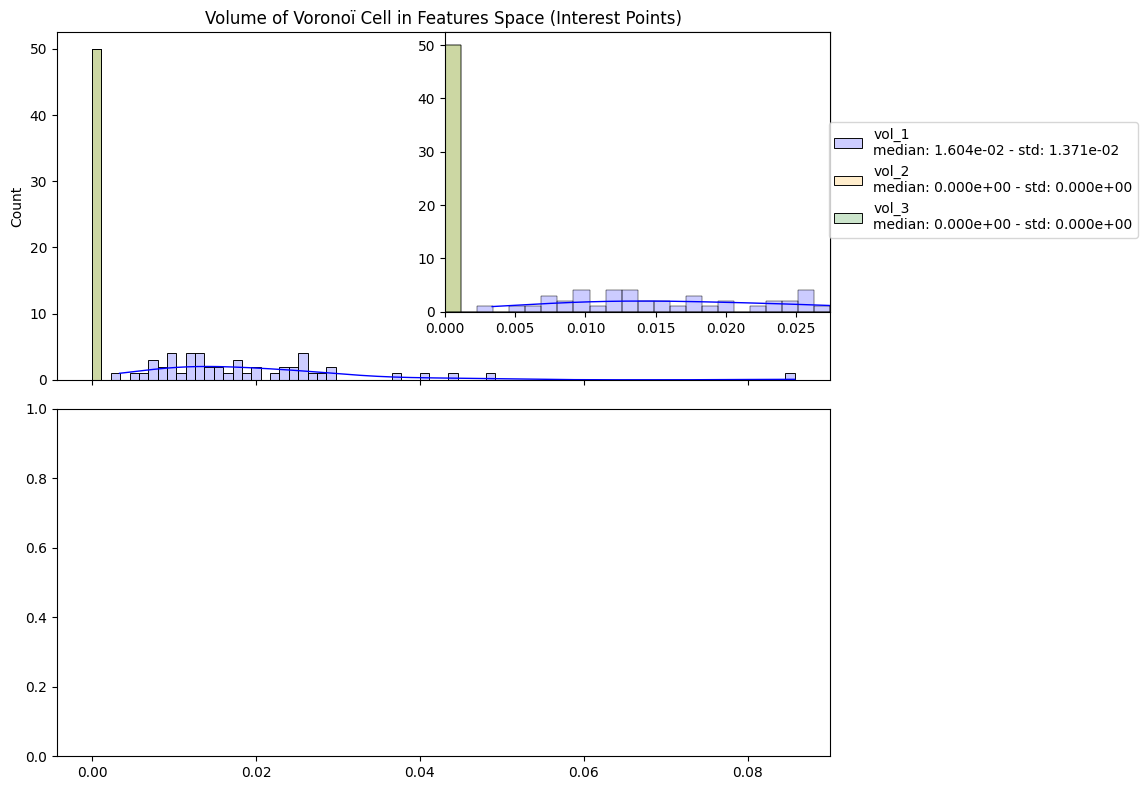

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_std_1_1 = f"vol_1\nmedian: {np.median(vol_1_1):.3e} - std: {np.std(vol_1_1):.3e}"
mean_std_1_2 = f"vol_2\nmedian: {np.median(vol_1_2):.3e} - std: {np.std(vol_1_2):.3e}"
mean_std_1_3 = f"vol_3\nmedian: {np.median(vol_1_3):.3e} - std: {np.std(vol_1_3):.3e}"

mean_std_2_1 = f"vol_1\nmedian: {np.median(vol_2_1):.3e} - std: {np.std(vol_2_1):.3e}"
mean_std_2_2 = f"vol_2\nmedian: {np.median(vol_2_2):.3e} - std: {np.std(vol_2_2):.3e}"
mean_std_2_3 = f"vol_3\nmedian: {np.median(vol_2_3):.3e} - std: {np.std(vol_2_3):.3e}"
                                 

all_data_1 = np.concatenate([vol_1_1, vol_1_2, vol_1_3])
all_data_2 = np.concatenate([vol_2_1, vol_2_2, vol_2_3])   

bin_edges_1 = np.histogram_bin_edges(all_data_1, bins=75)
bin_edges_2 = np.histogram_bin_edges(all_data_2, bins=75)

percentile_1 = np.percentile(all_data_1, 95)
percentile_2 = np.percentile(all_data_2, 95)

# Create the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)


sns.histplot(vol_1_1, ax=axes[0], label='vol_1_1', kde=True, color='blue', bins=bin_edges_1, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_1_2, ax=axes[0], label='vol_1_2', kde=True, color='orange', bins=bin_edges_1, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_1_3, ax=axes[0], label='vol_1_3', kde=True, color='green', bins=bin_edges_1, alpha=0.2, line_kws={'linewidth': 1})
axes[0].set_title('Volume of Voronoï Cell in Features Space (Interest Points)')
axes[0].legend().set_visible(False)

# Add zoomed inset plot
inset_ax = fig.add_axes([0.45, 0.604, 0.385, 0.35])
sns.histplot(vol_1_1, ax=inset_ax, kde=True, color='blue', bins=bin_edges_1, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_1_2, ax=inset_ax, kde=True, color='orange', bins=bin_edges_1, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_1_3, ax=inset_ax, kde=True, color='green', bins=bin_edges_1, alpha=0.2, line_kws={'linewidth': 1})
inset_ax.set_xlim(0, percentile_1)
inset_ax.set_ylim(0, None)
inset_ax.set_xlabel('')
inset_ax.set_ylabel('')
fig.legend(lines, [mean_std_1_1, mean_std_1_2, mean_std_1_3], loc='upper right', bbox_to_anchor=(1.15, 0.85))


# Second subplot with displot and kde
sns.histplot(vol_2_1, ax=axes[1], label='vol_2_1', kde=True, color='blue', bins=bin_edges_2, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_2_2, ax=axes[1], label='vol_2_2', kde=True, color='orange', bins=bin_edges_2, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_2_3, ax=axes[1], label='vol_2_3', kde=True, color='green', bins=bin_edges_2, alpha=0.2, line_kws={'linewidth': 1})
axes[1].set_title('Volume of Voronoï Cell in Features + Targets Space (Interest Points)')
axes[1].legend().set_visible(False)
axes[1].set_xlabel('')

inset_ax = fig.add_axes([0.45, 0.12, 0.385, 0.353])
sns.histplot(vol_2_1, ax=inset_ax, kde=True, color='blue', bins=bin_edges_2, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_2_2, ax=inset_ax, kde=True, color='orange', bins=bin_edges_2, alpha=0.2, line_kws={'linewidth': 1})
sns.histplot(vol_2_3, ax=inset_ax, kde=True, color='green', bins=bin_edges_2, alpha=0.2, line_kws={'linewidth': 1})
inset_ax.set_xlim(0, percentile_2)
inset_ax.set_ylim(0, None)
inset_ax.set_xlabel('')
inset_ax.set_ylabel('')

fig.legend(lines, [mean_std_2_1, mean_std_2_2, mean_std_2_3], loc='lower right', bbox_to_anchor=(1.15, 0.15))

lines, labels = axes[0].get_legend_handles_labels()

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# New plot visualizaiton

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_volume_vorono(data, volume_voronoi):
    all_features_data = []
    all_targets_data = []

    for val in volume_voronoi.values():
        all_features_data.extend(val['features'])
        all_targets_data.extend(val['features_targets'])

    print("Voronoi Volume is interpretable only if run_until_max_size==False (same number of interest points)")

    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    inset_ax_features = fig.add_axes([0.12, 0.69, 0.2, 0.25])  # First subplot zoomed
    inset_ax_features_box = fig.add_axes([0.37, 0.69, 0.25, 0.25])  # Second subplot zoomed with boxplot
    inset_ax_targets = fig.add_axes([0.12, 0.21, 0.2, 0.25])   # Second subplot zoomed
    inset_ax_targets_box = fig.add_axes([0.37, 0.21, 0.25, 0.25])  # Second subplot zoomed with boxplot

    legend_info_features = []
    legend_info_targets = []

    feature_data_list = []
    target_data_list = []
    feature_labels = []
    target_labels = []

    for data_keys, vol_voronoi in zip(data.keys(), volume_voronoi.values()):
        features = vol_voronoi['features']
        features_targets = vol_voronoi['features_targets']

        sorted_features = sorted(features)
        sorted_features_targets = sorted(features_targets)

        median_features = np.median(features)
        std_features = np.std(features)
        median_targets = np.median(features_targets)
        std_targets = np.std(features_targets)

        axes[0].bar(range(len(sorted_features)), sorted_features, color=data[data_keys]['color'], alpha=0.25, label=data[data_keys]['name'])
        axes[1].bar(range(len(sorted_features_targets)), sorted_features_targets, color=data[data_keys]['color'], alpha=0.25, label=data[data_keys]['name'])

        # Inset plots for the first 75% values
        inset_ax_features.bar(range(int(0.75 * len(sorted_features))), sorted_features[:int(0.75 * len(sorted_features))], color=data[data_keys]['color'], alpha=0.25)
        inset_ax_targets.bar(range(int(0.75 * len(sorted_features_targets))), sorted_features_targets[:int(0.75 * len(sorted_features_targets))], color=data[data_keys]['color'], alpha=0.25)


        feature_data_list.append(features)
        target_data_list.append(features_targets)
        feature_labels.append(data[data_keys]['name'])
        target_labels.append(data[data_keys]['name'])

        legend_info_features.append(f"{data[data_keys]['name']}\n  median: {median_features:.3e}\n  std: {std_features:.3e}")
        legend_info_targets.append(f"{data[data_keys]['name']}\n  median: {median_targets:.3e} \n  std: {std_targets:.3e}")

    # Boxplots customization
    def customize_boxplot(ax, data_list, labels, colors):
        boxplots = ax.boxplot(data_list, labels=labels, patch_artist=True, medianprops=dict(color='black'))
        for patch, color in zip(boxplots['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        ax.grid(True)
        ax.set_xticklabels('', rotation=45)

    feature_colors = [data[data_keys]['color'] for data_keys in data.keys()]
    target_colors = [data[data_keys]['color'] for data_keys in data.keys()]

    customize_boxplot(inset_ax_features_box, feature_data_list, feature_labels, feature_colors)
    customize_boxplot(inset_ax_targets_box, target_data_list, target_labels, target_colors)

    axes[0].set_title('Volume of Voronoï Cell in Features Space (Interest Points)')
    axes[0].legend().set_visible(False)

    axes[1].set_title('Volume of Voronoï Cell in Features + Targets Space (Interest Points)')
    axes[1].legend().set_visible(False)

    # Add custom legends
    fig.legend(legend_info_features, loc='upper right', bbox_to_anchor=(1.1, 0.95), title='Features')
    fig.legend(legend_info_targets, loc='upper right', bbox_to_anchor=(1.1, 0.45), title='Features_Targets')

    fig.tight_layout(rect=[0, 0, 0.9, 1])
    return fig

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_volume_voronoi(data, volume_voronoi):
    all_features_data = []
    all_targets_data = []

    for val in volume_voronoi.values():
        all_features_data.extend(val['features'])
        all_targets_data.extend(val['features_targets'])

    print("Voronoi Volume is interpretable only if run_until_max_size==False (same number of interest points)")

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [0.5, 0.5], 'width_ratios': [0.9, 0.1]})

    inset_ax_features = fig.add_axes([0.16, 0.67, 0.2, 0.2])  # First subplot zoomed
    inset_ax_features_box = fig.add_axes([0.4, 0.67, 0.2, 0.2])  # Second subplot zoomed with boxplot
    inset_ax_targets = fig.add_axes([0.16, 0.25, 0.2, 0.2])   # Second subplot zoomed
    inset_ax_targets_box = fig.add_axes([0.4, 0.25, 0.2, 0.2])  # Second subplot zoomed with boxplot

    legend_info_features = []
    legend_info_targets = []

    feature_data_list = []
    target_data_list = []
    feature_labels = []
    target_labels = []

    for data_keys, vol_voronoi in zip(data.keys(), volume_voronoi.values()):
        features = vol_voronoi['features']
        features_targets = vol_voronoi['features_targets']

        sorted_features = sorted(features)
        sorted_features_targets = sorted(features_targets)

        median_features = np.median(features)
        std_features = np.std(features)
        median_targets = np.median(features_targets)
        std_targets = np.std(features_targets)

        axes[0, 0].bar(range(len(sorted_features)), sorted_features, color=data[data_keys]['color'], alpha=0.25, label=data[data_keys]['name'])
        axes[1, 0].bar(range(len(sorted_features_targets)), sorted_features_targets, color=data[data_keys]['color'], alpha=0.25, label=data[data_keys]['name'])

        inset_ax_features.bar(range(int(0.75 * len(sorted_features))), sorted_features[:int(0.75 * len(sorted_features))], color=data[data_keys]['color'], alpha=0.25)
        inset_ax_targets.bar(range(int(0.75 * len(sorted_features_targets))), sorted_features_targets[:int(0.75 * len(sorted_features_targets))], color=data[data_keys]['color'], alpha=0.25)

        feature_data_list.append(features)
        target_data_list.append(features_targets)
        feature_labels.append(data[data_keys]['name'])
        target_labels.append(data[data_keys]['name'])

        # Calculate outliers
        q1_features = np.percentile(features, 25)
        q3_features = np.percentile(features, 75)
        iqr_features = q3_features - q1_features
        outliers_features = [x for x in features if x < q1_features - 1.5 * iqr_features or x > q3_features + 1.5 * iqr_features]

        q1_targets = np.percentile(features_targets, 25)
        q3_targets = np.percentile(features_targets, 75)
        iqr_targets = q3_targets - q1_targets
        outliers_targets = [x for x in features_targets if x < q1_targets - 1.5 * iqr_targets or x > q3_targets + 1.5 * iqr_targets]

        n_outliers_features = len(outliers_features)
        n_outliers_targets = len(outliers_targets)

        legend_info_features.append(f"{data[data_keys]['name']}\n  median: {median_features:.3e}\n  std: {std_features:.3e}\n  n_outliers: {n_outliers_features}")
        legend_info_targets.append(f"{data[data_keys]['name']}\n  median: {median_targets:.3e}\n  std: {std_targets:.3e}\n  n_outliers: {n_outliers_targets}")

    def customize_boxplot(ax, data_list, labels, colors):
        boxplots = ax.boxplot(data_list, labels=labels, patch_artist=True, medianprops=dict(color='black'))
        for patch, color in zip(boxplots['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
        ax.grid(True)
        ax.set_xticklabels(labels, rotation=45)

        # Determine the ylim to show IQR and highest whisker
        data_concat = np.concatenate(data_list)
        q1 = np.percentile(data_concat, 25)
        q3 = np.percentile(data_concat, 75)
        iqr = q3 - q1
        ylim_high = q3 + 1.6 * iqr # 1.6 to add a little margin (1.5 is the default value)
        ax.set_ylim([0, ylim_high])

    feature_colors = [data[data_keys]['color'] for data_keys in data.keys()]
    target_colors = [data[data_keys]['color'] for data_keys in data.keys()]

    customize_boxplot(inset_ax_features_box, feature_data_list, feature_labels, feature_colors)
    customize_boxplot(inset_ax_targets_box, target_data_list, target_labels, target_colors)

    axes[0, 0].set_title('Volume of Voronoï Cell in Features Space (Interest Points)')
    axes[0, 0].legend().set_visible(False)

    axes[1, 0].set_title('Volume of Voronoï Cell in Features + Targets Space (Interest Points)')
    axes[1, 0].legend().set_visible(False)

    # Add custom legends
    axes[0, 1].axis('off')  # Hide the empty subplot for the legend
    axes[1, 1].axis('off')  # Hide the empty subplot for the legend
    fig.legend(legend_info_features, loc='center', bbox_to_anchor=(0.85, 0.8), title='Features')
    fig.legend(legend_info_targets, loc='center', bbox_to_anchor=(0.85, 0.3), title='Features_Targets')

    return fig




In [254]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
n_points = 50
dim = 2
tol = 1e-3

points_1 = np.random.rand(n_points, dim)
clusters_1 = generate_clusters(1, n_points, dim)
clusters_1 = remove_points_outside_hypercube(clusters_1)
points_clusters_1 = add_uniform_points(clusters_1, n_points, dim)


In [149]:
vol_1_1 = volume_voronoi(points_1, dim, tol, False)
vol_1_2 = volume_voronoi(points_clusters_1, dim, tol, True)


100%|██████████| 55/55 [00:00<00:00, 557.04it/s]


Quantity of error volume :  0.0


100%|██████████| 55/55 [00:00<00:00, 580.48it/s]


Quantity of error volume :  1.1102230246251565e-16


In [150]:
data = {'exp0': {
            'name':'uniform_random',
            'color':'red'
        },
        'exp1': {
            'name':'cluster_random',
            'color':'blue'
        },
    }

In [151]:
l_vol = {'exp0': {
            'features': vol_1_1,
            'features_targets': [0]*50
        },
        'exp1': {
            'features': vol_1_2,
            'features_targets': [0]*50
        },
    }

In [152]:
params_voronoi = {
    'compute_voronoi': {
        'features': True,
        'features_targets': False
    }
}  

Voronoi Volume is interpretable only if run_until_max_size==False (same number of interest points)


C:\Users\Le R\AppData\Local\Temp\ipykernel_13764\1137054410.py:84: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, ylim_high])


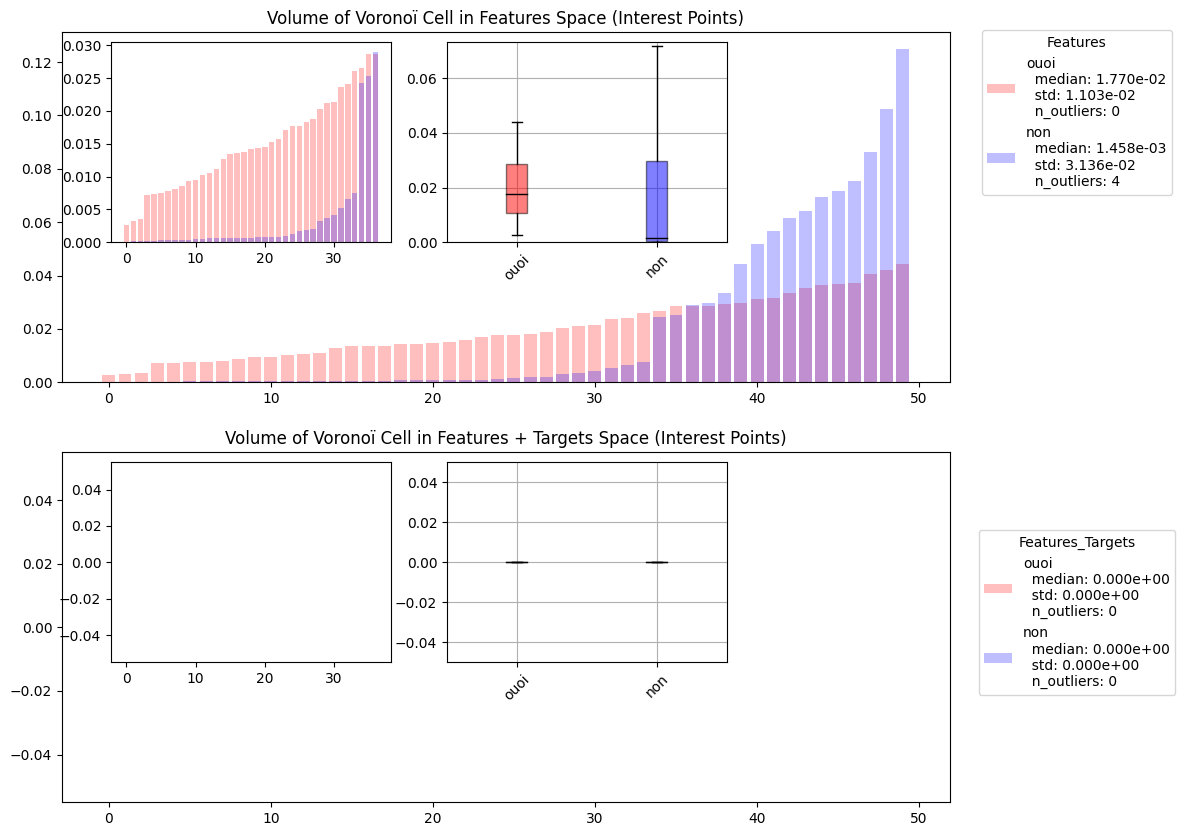

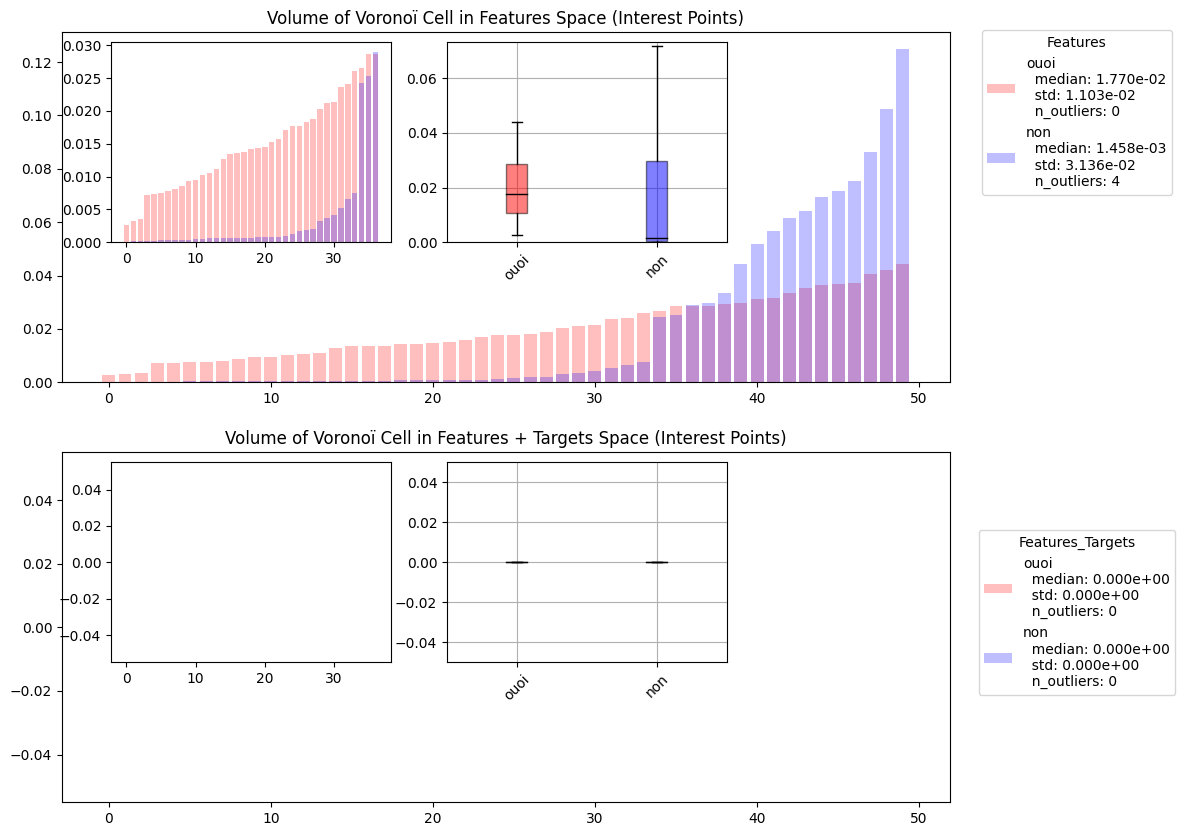

In [259]:
plot_volume_voronoi(data, l_vol)

Une meilleure distribution dans l'espace se voit par :
- une haute médiane
- le 1QR assez haut
- le 3QR assez bas 
- peu de outliers (représentent des régions très grandes, donc qui ne sont pas explorées)
- un petit std *(à confirmer)*

Ainsi le graphique rouge est le cas "espéré" en pratique puisque c'est une distribution uniforme dans l'espace tandis que le bleu est tous l'inverse, un cluster.